Step 1: Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Step2: Load The Dataset

In [4]:
ratings = pd.read_csv('datasets/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [8]:
ratings.shape

(100004, 4)

In [10]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100004
Number of unique movieId's: 9066
Number of unique users: 671
Average number of ratings per user: 149.04
Average number of ratings per movie: 11.03


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Step 3 : Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70002, 4)
(30002, 4)


In [16]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 4: Creating Dummy Train and Test Sets

It is used to mark the ratings that will be used in the prediction

In [20]:
# make a copy of train and test datasets
copy_train = X_train.copy()
copy_test = X_test.copy()

copy_train['rating'] = copy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
copy_test['rating'] = copy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
# The movies not rated by user is marked as 1 for prediction 
copy_train = copy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation 
copy_test = copy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [24]:
copy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
copy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Step5 : Calculate User Similiarity using Cosine Similiarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.         0.         ... 0.         0.         0.02393547]
 [0.         1.         0.1038815  ... 0.02461364 0.05242847 0.04278715]
 [0.         0.1038815  1.         ... 0.03033982 0.03282569 0.07569511]
 ...
 [0.         0.02461364 0.03033982 ... 1.         0.         0.        ]
 [0.         0.05242847 0.03282569 ... 0.         1.         0.18450998]
 [0.02393547 0.04278715 0.07569511 ... 0.         0.18450998 1.        ]]
(671, 671)


Step5.1 : Predict the user rating

In [32]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[1.30337799e+01, 5.44926060e+00, 2.45313737e+00, ...,
        1.20464562e-01, 1.34956662e-01, 1.80611822e-01],
       [7.66222363e+01, 5.30689619e+01, 1.29076933e+01, ...,
        1.32398358e-01, 1.26234991e-01, 3.43261458e-01],
       [5.55388120e+01, 2.36795818e+01, 6.63921027e+00, ...,
        3.15486686e-01, 2.13397912e-01, 3.47930392e-01],
       ...,
       [1.70060137e+01, 8.05160470e+00, 3.14684783e+00, ...,
        7.22830712e-02, 0.00000000e+00, 2.47564924e-01],
       [6.25718199e+01, 2.58449970e+01, 1.02997955e+01, ...,
        1.64231594e-01, 2.45318594e-01, 4.67767180e-01],
       [1.05562842e+02, 3.51821767e+01, 1.24033851e+01, ...,
        4.99106902e-01, 3.00308694e-01, 5.61785507e-01]])

In [34]:
user_predicted_ratings.shape

(671, 8043)

In [36]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_predicted_ratings, copy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,13.033780,5.449261,2.453137,0.679754,1.964817,4.875659,2.370815,0.102612,0.952908,5.808705,...,0.126428,0.144489,0.090306,0.018473,0.158857,0.044694,0.067042,0.120465,0.134957,0.180612
2,76.622236,53.068962,12.907693,4.011674,15.803771,34.441235,12.232038,0.830773,5.546404,0.000000,...,0.240283,0.274609,0.171631,0.055903,0.277516,0.111590,0.167385,0.132398,0.126235,0.343261
3,55.538812,23.679582,6.639210,1.530928,7.409841,19.558837,4.684573,0.304889,2.288593,24.726943,...,0.243551,0.278344,0.173965,0.048133,0.242163,0.061612,0.092418,0.315487,0.213398,0.347930
4,71.958256,35.470020,11.032536,2.562926,11.585860,26.054558,9.991260,0.824395,3.921522,33.827430,...,0.312294,0.356907,0.223067,0.086111,0.456994,0.175620,0.263430,0.532784,0.232701,0.446134
5,61.071668,29.297462,8.109153,1.918585,11.516647,19.224022,7.814428,0.583283,1.951332,27.676196,...,0.229508,0.262295,0.163935,0.073583,0.514617,0.119646,0.179469,0.358784,0.349602,0.327869


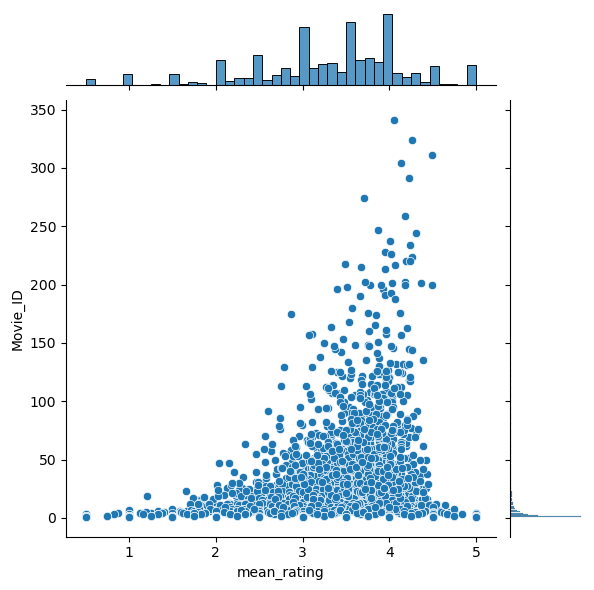

In [38]:


# Calculate mean rating and number of ratings for each movie
movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count'])
movie_stats.columns = ['mean_rating', 'Movie_ID']

# Visualize the relationship between average rating and the number of ratings
sb.jointplot(x='mean_rating', y='Movie_ID', data=movie_stats)

# Show the plot
plt.show()

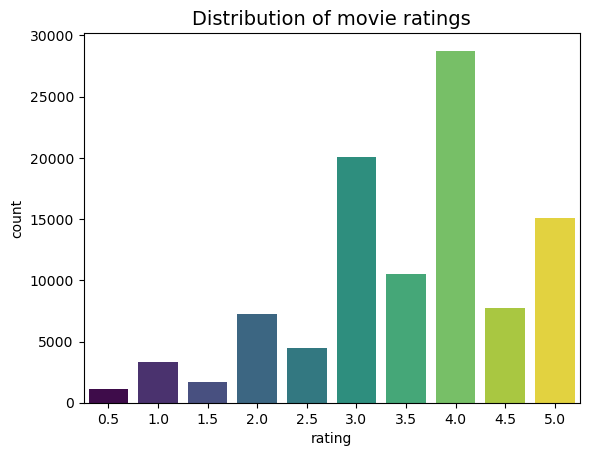

In [39]:
sb.countplot(x="rating", data=ratings, palette="viridis", hue="rating", legend=False)

plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [42]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
318     88.928528
296     81.196488
593     75.446704
2571    70.828827
260     69.612464
Name: 43, dtype: float64

In [44]:
print(f"Mean Movie rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean Movie rating: 3.54.
Mean rating per user: 3.66.


In [46]:
# Make a copy
user_similarity = user_data.copy()

# Pick a target user
target_userID = 1

# Remove target user ID from the user_similarity matrix
user_similarity.drop(index=target_userID, inplace=True)

user_similarity.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Number of similar users to get (Top 10 most similar user for target user)
n = 10

# User similarity threshold 
user_similarity_threshold = 2


# Get top n similar users
top_similar_users = user_similarity[user_similarity[target_userID]>user_similarity_threshold][target_userID].sort_values(ascending=True)[:n]

print(f'Top {n} similar users for user {target_userID} :\n', top_similar_users)

# this code calculates and prints the top similar users for the specified
# target user, considering the user similarity threshold. These similar users
# can be used in collaborative filtering recommendation systems to suggest
# movies that users with similar preferences enjoyed.

Top 10 similar users for user 1 :
 userId
165    2.5
262    2.5
7      3.0
149    3.0
150    3.0
163    3.0
200    3.0
212    3.0
241    3.0
252    3.0
Name: 1, dtype: float64


In [56]:
def get_similar_user(userID):
    user_s = user_data.copy()
    user_similarity_threshold = 2

    user_s.drop(index=userID, inplace =True)
    similar_user = user_s[user_s[userID] > user_similarity_threshold][userID].sort_values(ascending = True)
    return similar_user

In [58]:
userID = int(input("Enter userID: "))

while userID not in ratings['userId'].unique():
    userID = int(input("Enter valid userID: "))

sim_users = get_similar_user(userID)
print(f'\nSimilar users for user {userID} :\n', sim_users)

Enter userID:  2



Similar users for user 2 :
 userId
72     2.5
522    2.5
19     3.0
241    3.0
279    3.0
      ... 
115    5.0
662    5.0
177    5.0
85     5.0
298    5.0
Name: 2, Length: 71, dtype: float64


Second Method : Item-based collaborative filtering

Using Cosine Similiarity

In [62]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.29312319 0.2089444  ... 0.09364215 0.         0.06554951]
 [0.29312319 1.         0.19586877 ... 0.         0.         0.        ]
 [0.2089444  0.19586877 1.         ... 0.         0.         0.        ]
 ...
 [0.09364215 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.06554951 0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(8043, 8043)


Predicting Ratings for Item Based

In [66]:
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[ 7.06685729,  5.5669184 ,  3.43240972, ...,  0.75762196,
         0.26548932,  2.69538099],
       [48.00838796, 54.11267831, 24.22708097, ...,  1.30102204,
         0.23151015, 10.85351411],
       [23.77265718, 17.94221111,  8.5326474 , ...,  1.86113847,
         0.48008536,  6.20111701],
       ...,
       [11.10438842,  9.6850143 ,  6.10573827, ...,  0.27299815,
         0.        ,  5.71027824],
       [21.29294039, 15.32788347,  8.58332684, ...,  0.81837386,
         0.30285268,  5.97997039],
       [78.22073194, 49.54884076, 24.70523659, ...,  5.07466113,
         0.8710096 , 18.85811619]])

In [67]:
item_predicted_ratings.shape

(671, 8043)

In [69]:
copy_train.shape

(671, 8043)

In [70]:
# np.multiply for cell-by-cell multiplication 

item_final_ratings = np.multiply(item_predicted_ratings, copy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,7.066857,5.566918,3.432410,2.310125,3.659288,4.613999,4.144598,0.991955,2.292581,5.446323,...,2.695381,2.695381,2.695381,1.885681,3.377039,2.392670,2.392670,0.757622,0.265489,2.695381
2,48.008388,54.112678,24.227081,19.095393,30.375522,36.477313,28.697831,9.221338,18.370782,0.000000,...,10.853514,10.853514,10.853514,8.476851,9.214130,10.775891,10.775891,1.301022,0.231510,10.853514
3,23.772657,17.942211,8.532647,5.180997,10.713019,15.274718,7.863384,3.274880,5.255132,17.867196,...,6.201117,6.201117,6.201117,5.596308,7.511046,4.715341,4.715341,1.861138,0.480085,6.201117
4,109.859407,98.244427,51.248676,31.622443,60.991106,70.423507,61.029445,22.989648,31.428696,85.186125,...,27.853303,27.853303,27.853303,31.481820,37.817179,40.400585,40.400585,11.268766,0.910888,27.853303
5,56.458438,45.395535,20.158634,12.192075,30.626761,34.194423,23.777144,9.296242,7.644094,43.798221,...,10.264494,10.264494,10.264494,16.415521,24.243311,15.381262,15.381262,3.622707,1.325247,10.264494


Recommended Top 5 Movie for User 1

In [72]:
item_final_ratings.iloc[1].sort_values(ascending = False)[0:5]

movieId
597    65.787453
380    65.590200
587    63.467309
339    61.088954
500    60.632383
Name: 2, dtype: float64

Evaluation

User-Based Collaborative Filtering


In [79]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.04570869 ... 0.         0.         0.12090099]
 [0.         0.04570869 1.         ... 0.04426641 0.17405647 0.06515305]
 ...
 [0.         0.         0.04426641 ... 1.         0.11881211 0.        ]
 [0.         0.         0.17405647 ... 0.11881211 1.         0.01210655]
 [0.         0.12090099 0.06515305 ... 0.         0.01210655 1.        ]]
- - - - - - - - - - 
(671, 671)


In [81]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 0.76594634,  0.13888928,  0.62565718, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.84649266,  3.2192931 ,  1.5645547 , ...,  0.13569032,
         0.1898524 ,  0.        ],
       [15.29495615,  5.12111393,  3.19769825, ...,  0.16909683,
         0.27663233,  0.17333754],
       ...,
       [10.94862297,  2.46876118,  1.62411658, ...,  0.08213049,
         0.12410675,  0.24321615],
       [28.38684253,  4.66589509,  3.54837608, ...,  0.12568429,
         0.43523462,  0.        ],
       [17.10067183,  5.06260893,  1.95713401, ...,  0.43936277,
         0.46076123,  0.        ]])

In [82]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, copy_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,13.653968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.334717,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [119]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
predicted = scaler.transform(X)

print(predicted)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [4.27542739        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [89]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30002

In [90]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# RMSE Score

diff_sqr_matrix = (test - predicted)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.5578254915254068


In [123]:
# Mean absolute error

mae = np.abs(predicted - test).sum().sum()/total_non_nan
print(mae)

1.194573888399201


Item-Based Collaborative Filtering

In [99]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.12118321 0.20512861 ... 0.12175841 0.15219801 0.        ]
 [0.12118321 1.         0.09170711 ... 0.         0.1463641  0.        ]
 [0.20512861 0.09170711 1.         ... 0.         0.         0.        ]
 ...
 [0.12175841 0.         0.         ... 1.         0.         0.        ]
 [0.15219801 0.1463641  0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(5778, 5778)


In [100]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[ 0.50156089,  0.20652961,  0.73158788, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.26617785,  3.09020513,  2.03089482, ...,  0.53966661,
         1.85262843,  0.        ],
       [ 8.81152194,  5.08928372,  3.62280993, ...,  1.94481013,
         3.36338091,  0.35547863],
       ...,
       [ 4.46781776,  2.3188877 ,  2.02539879, ...,  0.24276779,
         1.0566874 ,  0.24276779],
       [ 8.92331531,  2.84841255,  2.18626564, ...,  0.48703363,
         3.01990066,  0.        ],
       [17.97096708,  9.74377424,  4.59882486, ...,  4.26678231,
         8.63225121,  0.        ]])

In [101]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, copy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,39.325192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,18.743378,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [125]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
predicted = scaler.transform(X)

print(predicted)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [0.62341011        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [105]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30002

In [108]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# RMSE Score

diff_sqr_matrix = (test - predicted)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.5271010985132345


In [129]:
# Mean absolute error

mae = np.abs(predicted - test).sum().sum()/total_non_nan
print(mae)

2.2282980637061653
